<a href="https://colab.research.google.com/github/sethforbes/IS841-Spring-2022/blob/main/IntuitAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Preparation**
First, we imported the necessary tools to run different models and evaluations on the dataset. Then, we ran a few tests to further explore the dataset and any key relationships it may contain.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing necessary tools
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
from matplotlib.pyplot import figure

In [ ]:
# Uploading the csv file to google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth

intuit_dataset = pd.read_excel ('/content/INTUIT_W_STATE.xlsx')

In [ ]:
intuit_dataset.head()

,ID,SEX,STATE,BIZFLAG,ORIGDATEMOS,LASTDATEMOS,LASTDL,TOTDL,ORIGPROD,LASTPROD,RES1
0,1,U,OTHER,1,493,493,0,0,WV,WV,0
1,2,U,OTHER,1,94,94,0,0,VQ,VQ,0
2,3,U,OTHER,1,199,199,0,0,VQ,VQ,0
3,4,U,OTHER,1,198,198,0,0,TP,TP,0
4,5,U,OTHER,1,190,190,0,0,VP,VP,0


After seeing that several columns were both unnamed and contained insufficient data, we removed those columns to clean up the datset a bit.

In [ ]:
intuit_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           10000 non-null  int64 
 1   SEX          10000 non-null  object
 2   STATE        9765 non-null   object
 3   BIZFLAG      10000 non-null  int64 
 4   ORIGDATEMOS  10000 non-null  int64 
 5   LASTDATEMOS  10000 non-null  int64 
 6   LASTDL       10000 non-null  int64 
 7   TOTDL        10000 non-null  int64 
 8   ORIGPROD     10000 non-null  object
 9   LASTPROD     10000 non-null  object
 10  RES1         10000 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 859.5+ KB


In [ ]:
intuit_dataset.describe()

,ID,BIZFLAG,ORIGDATEMOS,LASTDATEMOS,LASTDL,TOTDL,RES1
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.244400,567.483100,233.376600,1139.104500,3661.967700,0.081000
std,2886.89568,0.429752,1627.095564,145.283792,7147.200346,19916.565871,0.272849
min,1.00000,0.000000,93.000000,93.000000,0.000000,0.000000,0.000000
25%,2500.75000,0.000000,192.000000,98.000000,0.000000,0.000000,0.000000
50%,5000.50000,0.000000,290.000000,193.000000,0.000000,0.000000,0.000000
75%,7500.25000,0.000000,393.000000,297.000000,0.000000,2495.000000,0.000000
max,10000.00000,1.000000,9500.000000,690.000000,271000.000000,901120.000000,1.000000


As we can see below, there are some null values present. Since this is the official list from Wave 1, we're not going to remove these null values. We will be doing some data cleansing for Wave 2, however.

In [ ]:
intuit_dataset.isnull().sum()

ID               0
SEX              0
STATE          235
BIZFLAG          0
ORIGDATEMOS      0
LASTDATEMOS      0
LASTDL           0
TOTDL            0
ORIGPROD         0
LASTPROD         0
RES1             0
dtype: int64

# **Exploratory Analysis & Visualization**

Text(0.6944444444444233, 0.5, 'Response Rate')

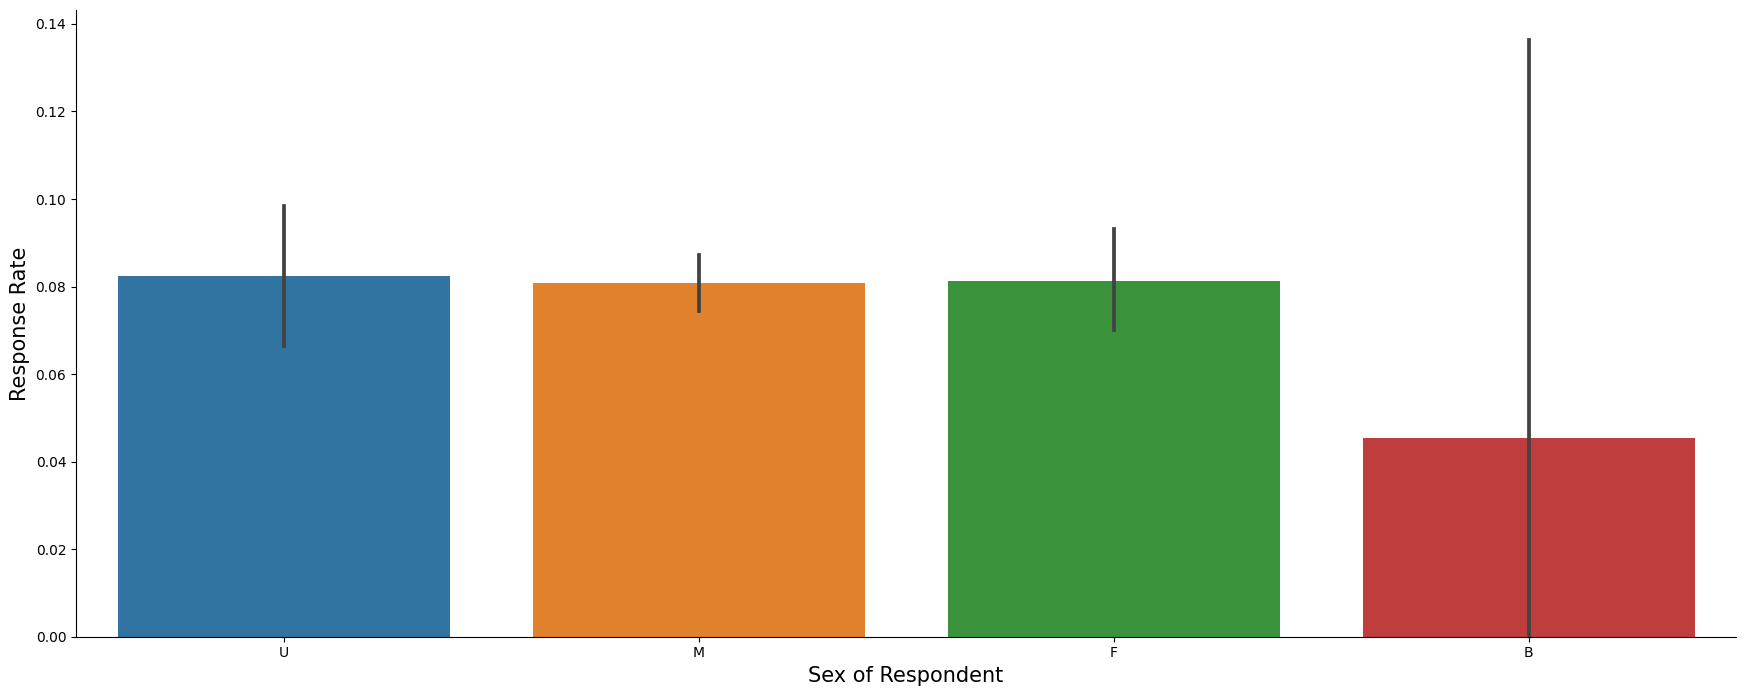

In [ ]:
# Relation between sex of the respondent and the number of responses to the Wave 1 mailer
number_yes = intuit_dataset.pivot_table(index = 'SEX', values = 'RES1', aggfunc = np.median)
sns.catplot(x="SEX", y="RES1",
                kind="bar",
                data=intuit_dataset, aspect=2.5, height=7)
plt.xlabel('Sex of Respondent', fontsize='15')
plt.ylabel('Response Rate',fontsize='15')

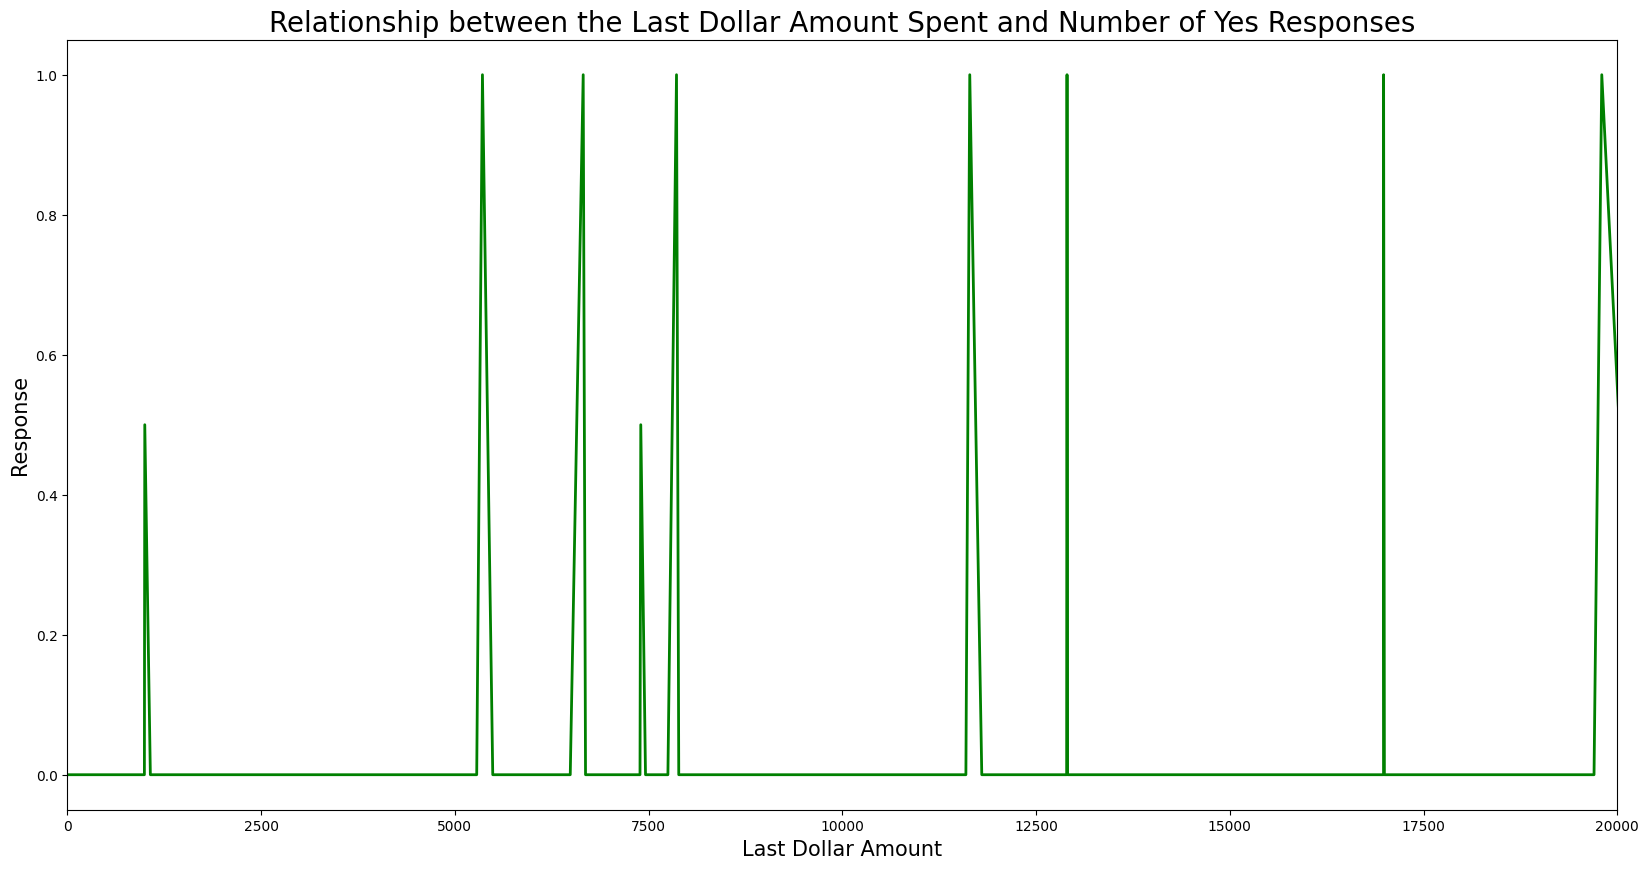

In [ ]:
# Relation between living area and sale price median
last_dollar = intuit_dataset.pivot_table(index = 'LASTDL', values = 'RES1', aggfunc = np.median)

plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(last_dollar,color = 'green', linewidth=2)
plt.xlabel('Last Dollar Amount', fontsize='15')
plt.ylabel('Response', fontsize='15')
plt.title('Relationship between the Last Dollar Amount Spent and Number of Yes Responses', fontsize = 20)
plt.xlim(0,20000)
plt.show()

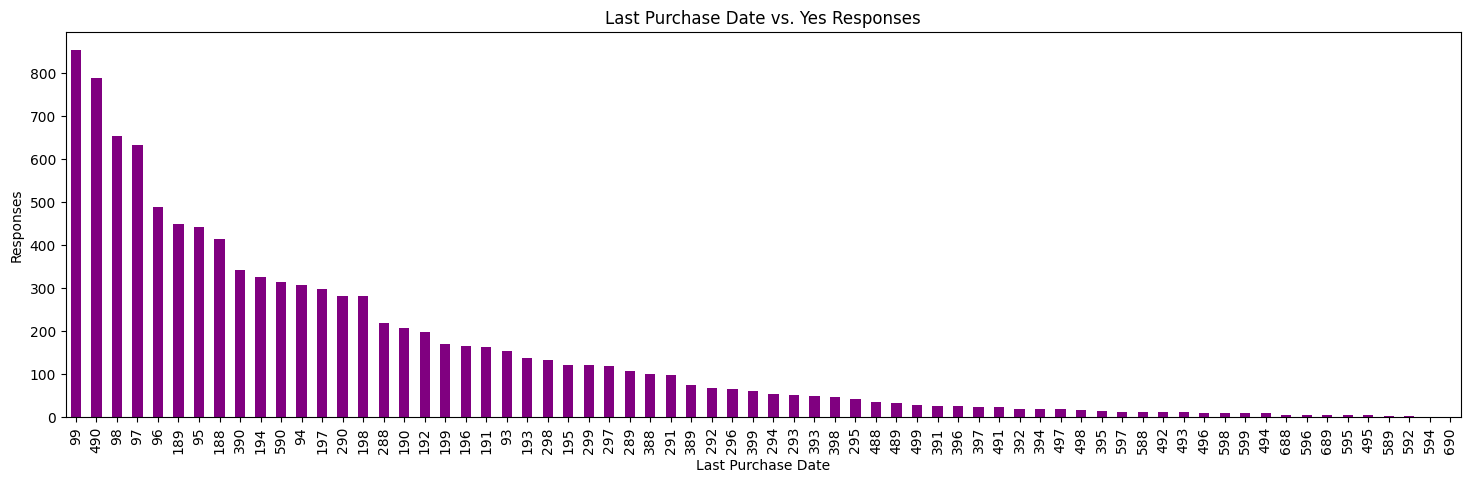

In [ ]:
# Checking the affect of the last purchase date on how many people responded to the mailer
plt.figure(figsize=(18,5))
intuit_dataset['LASTDATEMOS'].value_counts().plot(kind='bar', color = 'purple')
plt.title('Last Purchase Date vs. Yes Responses')
plt.xlabel('Last Purchase Date')
plt.ylabel('Responses')
plt.show()

In [ ]:
# Relation between sex of the respondent and the number of responses to the Wave 1 mailer
number_yes = intuit_dataset.pivot_table(index = '', values = 'RES1', aggfunc = np.median)
sns.catplot(x="SEX", y="RES1",
                kind="bar",
                data=intuit_dataset, aspect=2.5, height=7)
plt.xlabel('Sex of Respondent', fontsize='15')
plt.ylabel('Response Rate',fontsize='15')

# **Model**

In [ ]:
corr_matrix = intuit_dataset.corr()
print(corr_matrix.RES1.sort_values(ascending=False))

RES1           1.000000
LASTDATEMOS    0.009976
BIZFLAG        0.001737
ORIGDATEMOS   -0.004314
TOTDL         -0.008285
LASTDL        -0.016327
ID            -0.068196
Name: RES1, dtype: float64


<ipython-input-19-67bfcb6d5b76>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = intuit_dataset.corr()


In [ ]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization
from termcolor import colored as cl # text customization

from sklearn.model_selection import train_test_split # data split

from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm

from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric

sb.set_style('whitegrid') # plot style
plt.rcParams['figure.figsize'] = (20, 10) # plot size

X_var = intuit_dataset[["ORIGDATEMOS", "LASTDATEMOS", "LASTDL"]].values
y_var = intuit_dataset['RES1'].values

X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.3, random_state = 833)

print(cl('X_train samples : ', attrs = ['bold']), X_train[0:5])
print(cl('X_test samples : ', attrs = ['bold']), X_test[0:5])
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:5])
print(cl('y_test samples : ', attrs = ['bold']), y_test[0:5])

X_train samples :  [[   94    94     0]
 [  288    94     0]
 [  290    95     0]
 [  492   390  2495]
 [  499   499 10250]]
X_test samples :  [[ 198  198    0]
 [ 488  488    0]
 [9500  188 9900]
 [ 199  197    0]
 [ 194  194    0]]
y_train samples :  [0 0 0 0 0]
y_test samples :  [0 0 0 0 1]


In [ ]:
# 1. OLS

ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)

# 2. Ridge

ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
ridge_yhat = ridge.predict(X_test)

# 3. Lasso

lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)
lasso_yhat = lasso.predict(X_test)

# 4. Bayesian

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

# 5. ElasticNet

en = ElasticNet(alpha = 0.01)
en.fit(X_train, y_train)
en_yhat = en.predict(X_test)

In [ ]:
print(cl('EXPLAINED VARIANCE SCORE:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of OLS model is {}'.format(evs(y_test, ols_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Ridge model is {}'.format(evs(y_test, ridge_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Lasso model is {}'.format(evs(y_test, lasso_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Bayesian model is {}'.format(evs(y_test, bayesian_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of ElasticNet is {}'.format(evs(y_test, en_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

EXPLAINED VARIANCE SCORE:
-------------------------------------------------------------------------------
Explained Variance Score of OLS model is -7.481715941759504e-05
-------------------------------------------------------------------------------
Explained Variance Score of Ridge model is -7.481715973489678e-05
-------------------------------------------------------------------------------
Explained Variance Score of Lasso model is -7.613682864882065e-05
-------------------------------------------------------------------------------
Explained Variance Score of Bayesian model is -7.489030194540724e-05
-------------------------------------------------------------------------------
Explained Variance Score of ElasticNet is -7.545976079414984e-05
-------------------------------------------------------------------------------


In [ ]:
print(cl('R-SQUARED:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of OLS model is {}'.format(r2(y_test, ols_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Ridge model is {}'.format(r2(y_test, ridge_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Lasso model is {}'.format(r2(y_test, lasso_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Bayesian model is {}'.format(r2(y_test, bayesian_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of ElasticNet is {}'.format(r2(y_test, en_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

R-SQUARED:
-------------------------------------------------------------------------------
R-Squared of OLS model is -0.0014052535188671111
-------------------------------------------------------------------------------
R-Squared of Ridge model is -0.0014052535192421445
-------------------------------------------------------------------------------
R-Squared of Lasso model is -0.0014070386945932434
-------------------------------------------------------------------------------
R-Squared of Bayesian model is -0.0014053399139675182
-------------------------------------------------------------------------------
R-Squared of ElasticNet is -0.0014061288531674876
-------------------------------------------------------------------------------
